# Brain Tumor Detection using VGG19 Architecture
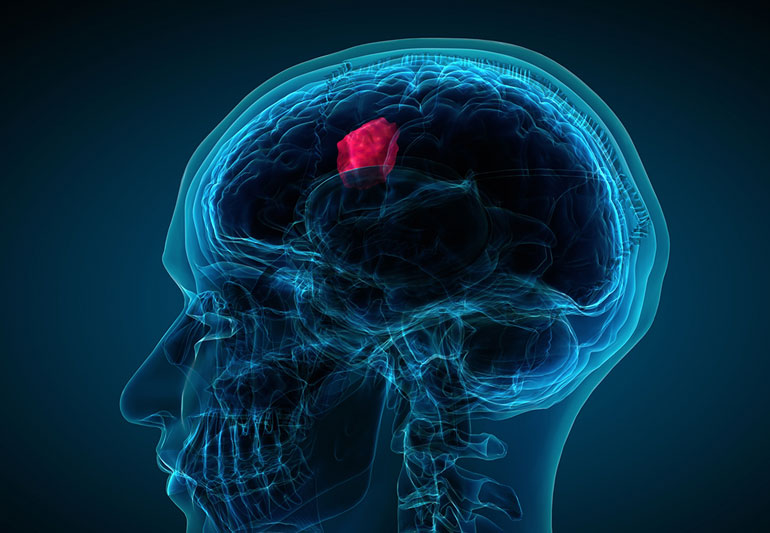

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Library

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Taking the Dataset from Google Drive

In [4]:
# importing dataset
brain_df = pd.read_csv('/content/drive/MyDrive/brain dataset/Brain Tumor.csv',usecols=[0,1])

In [5]:
brain_df.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


In [6]:
brain_df.isna().sum()

Image    0
Class    0
dtype: int64

In [7]:
brain_df['Class'].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

# Target Class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



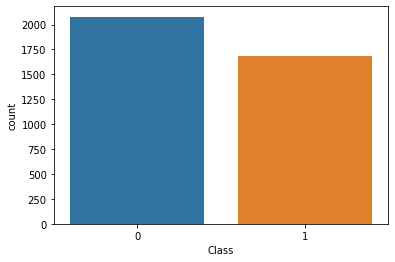

In [13]:
#plot the value count

sns.countplot(brain_df['Class'])

# Making paths for each Image 

In [14]:
path_list = []
base_path = '/content/drive/MyDrive/brain dataset/Brain Tumor/Brain Tumor'
for entry in os.listdir(base_path):
    path_list.append( os.path.join(base_path,entry))

In [15]:
#create path dictonary and then map itto brain_df['pathes']
pathes_dict={os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
brain_df['pathes'] = brain_df['Image'].map(pathes_dict.get)

In [16]:
brain_df.head()

,Image,Class,pathes
0,Image1,0,/content/drive/MyDrive/brain dataset/Brain Tum...
1,Image2,0,/content/drive/MyDrive/brain dataset/Brain Tum...
2,Image3,1,/content/drive/MyDrive/brain dataset/Brain Tum...
3,Image4,1,/content/drive/MyDrive/brain dataset/Brain Tum...
4,Image5,0,/content/drive/MyDrive/brain dataset/Brain Tum...


# Samples of Dataset

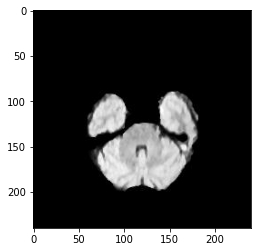

In [26]:
img = imread(brain_df['pathes'][6])
plt.imshow(img)

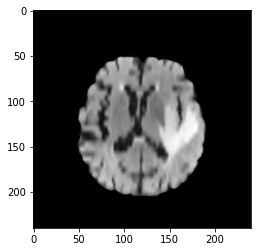

In [27]:
img = imread(brain_df['pathes'][3])
plt.imshow(img)

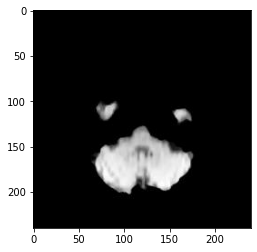

In [28]:
img = imread(brain_df['pathes'][1])
plt.imshow(img)

# Making Pixel Column

In [29]:
from PIL.Image import open
brain_df['pixels']=brain_df['pathes'].map(lambda x:np.asarray(open(x).resize((224,224))))

In [30]:
brain_df.head()

,Image,Class,pathes,pixels
0,Image1,0,/content/drive/MyDrive/brain dataset/Brain Tum...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,/content/drive/MyDrive/brain dataset/Brain Tum...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,/content/drive/MyDrive/brain dataset/Brain Tum...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,/content/drive/MyDrive/brain dataset/Brain Tum...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,/content/drive/MyDrive/brain dataset/Brain Tum...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


# Saving The Train file

In [31]:
brain_df.to_csv('brain_df_forColab.csv')

In [32]:
import keras
from keras import Sequential
from keras.applications import MobileNetV2
from keras.layers import Dense
from keras.preprocessing import image

In [33]:
image_list = []
for i in range(0,len(brain_df)):
    # load image
    brain_img = brain_df['pixels'][i].astype(np.float32)
    img_array = image.img_to_array(brain_img)
     # append to list of all images
    image_list.append(keras.applications.mobilenet_v2.preprocess_input(img_array))
    
# convert image list to single array
# Our feature
X = np.array(image_list)

# print shape of X
print(X.shape)

(3762, 224, 224, 3)


In [34]:
y = np.array(brain_df.Class)

In [35]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Train Test Split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.2
                                                ,random_state=0)


print('The shape of the X_train :'+' '+str(X_train.shape))
print('The size of the X_train :'+' '+str(X_train.shape[0]))
print('The shape of the X_test :'+' '+str(X_test.shape))
print('The size of the X_test:'+' '+str(X_test.shape[0]))

The shape of the X_train : (3009, 224, 224, 3)
The size of the X_train : 3009
The shape of the X_test : (753, 224, 224, 3)
The size of the X_test: 753


# VGG19 Architecture

In [37]:
# Building VGG19 model
from tensorflow.keras.applications import VGG19

backbone = VGG19(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 20,024,897
Trainable params: 20,024,897
Non-trainable params: 0
_________________________________________________________________


# compiling with SGD Optimizer and Binary Crossentropy

In [38]:
model.compile(
    # set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=keras.optimizers.SGD(lr=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)


# mock-train the model 
model.fit(
    X_train[:,:,:,:],
    y_train[:],
    epochs=110,
    verbose=1,
    validation_data=(X_test[:,:,:,:], y_test[:])
)
model.save("model_brain_VGG19.h5")
print("Saved model to disk")

Epoch 1/110
95/95 [==============================] - 92s 522ms/step - loss: 0.6887 - accuracy: 0.6030 - val_loss: 0.5412 - val_accuracy: 0.7211
Epoch 2/110
95/95 [==============================] - 46s 480ms/step - loss: 0.4456 - accuracy: 0.8021 - val_loss: 0.8376 - val_accuracy: 0.6003
Epoch 3/110
95/95 [==============================] - 47s 492ms/step - loss: 0.3889 - accuracy: 0.8424 - val_loss: 0.3170 - val_accuracy: 0.8699
Epoch 4/110
95/95 [==============================] - 47s 499ms/step - loss: 0.2889 - accuracy: 0.8900 - val_loss: 3.1598 - val_accuracy: 0.4688
Epoch 5/110
95/95 [==============================] - 48s 502ms/step - loss: 0.4382 - accuracy: 0.8582 - val_loss: 0.3006 - val_accuracy: 0.8672
Epoch 6/110
95/95 [==============================] - 48s 508ms/step - loss: 0.2455 - accuracy: 0.9046 - val_loss: 0.4455 - val_accuracy: 0.8393
Epoch 7/110
95/95 [==============================] - 49s 512ms/step - loss: 0.2258 - accuracy: 0.9195 - val_loss: 0.1916 - val_accuracy:

# Model Accuracy and Loss

In [39]:
pretrained_cnn = keras.models.load_model('./model_brain_VGG19.h5')

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(X_test,y_test)
# print loss score
print('Eval loss:',eval_score[0])
# print accuracy score
print('Eval accuracy:',eval_score[1] )

24/24 [==============================] - 4s 148ms/step - loss: 0.1252 - accuracy: 0.9801
Eval loss: 0.12524884939193726
Eval accuracy: 0.980079710483551


# Prediction on Test data

In [40]:
y_pred = pretrained_cnn.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



# Confusion Matrix

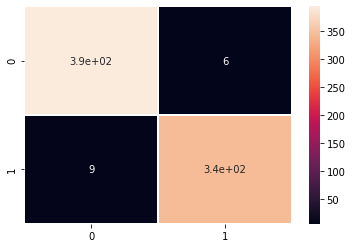

In [43]:
cm = confusion_matrix(y_test , y_pred ) 
sns.heatmap(cm, annot=True, linewidths=1)

# Classification Report 

In [41]:
from sklearn.metrics import confusion_matrix , classification_report
target_classes = ['No Tumor','Tumor']
classification_report(y_test , y_pred , output_dict = True
                      , target_names=target_classes)

{'No Tumor': {'f1-score': 0.9813200498132004,
  'precision': 0.9776674937965261,
  'recall': 0.985,
  'support': 400},
 'Tumor': {'f1-score': 0.9786628733997155,
  'precision': 0.9828571428571429,
  'recall': 0.9745042492917847,
  'support': 353},
 'accuracy': 0.9800796812749004,
 'macro avg': {'f1-score': 0.979991461606458,
  'precision': 0.9802623183268344,
  'recall': 0.9797521246458923,
  'support': 753},
 'weighted avg': {'f1-score': 0.9800743880947939,
  'precision': 0.9801003571675723,
  'recall': 0.9800796812749004,
  'support': 753}}

# This Model can Successfully Detect Brain Tumor with an Accuracy of 98%